In [125]:
import numpy as np
# Scipy.special for the sigmoid function expit()
import scipy.special
# Library for plotting arrays
import matplotlib.pyplot
# Ensure the plots are inside this notebook, not an external window
%matplotlib inline

# Neural network class definition.
class neuralNetwork:
    
    # Initialize neural network.
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Set number of nodes in each input, hidden and output layer.
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Learning rate.
        self.lr = learningrate
        
        # Link weight metrices, wih and who. 
        # Weights inside the arrays are w_i_j, where link is from node i to node j in the next layer.
        # w11 w21
        # w12 w22
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5),(self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5),(self.onodes, self.hnodes))
        
        # Activation function is the sigmoid function.
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass
    
    # Train the neural network.
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2D array.
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T 

        # Calculate signals into hidden layer.
        hidden_inputs = np.dot(self.wih, inputs)
        # Calculate the signals emerging from hidden layer.
        hidden_outputs = self.activation_function(hidden_inputs)

        # Calculate signals into final output layer.
        final_inputs = np.dot(self.who, hidden_outputs)
        # Calculate the signals emerging from final output layer.
        final_outputs = self.activation_function(final_inputs)
        
        # Output layer error is the (target - actual).
        output_errors = targets - final_outputs
        
        # Hidden errors is the output_errors, split by weights, recombined at hidden nodes.
        hidden_errors = np.dot(self.who.T, output_errors)
        
        # Update the weights for the links between the hidden and the output hayers.
        self.who += self.lr * np.dot((output_errors*final_outputs*(1.0 - final_outputs)),np.transpose(hidden_outputs)) 

        # Update the weights for the links between the input and the hidden layers.
        self.wih += self.lr * np.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)),np.transpose(inputs)) 

        pass
    
    # Query the neural network.
    def query(self, inputs_list):  
        # Convert inputs list to 2D array.
        inputs = np.array(inputs_list, ndmin = 2).T
        
        # Calculate signals into hidden layer.
        hidden_inputs = np.dot(self.wih, inputs)
        # Calculate the signals emerging from hidden layer.
        hidden_outputs = self.activation_function(hidden_inputs)

        # Calculate signals into final output layer.
        final_inputs = np.dot(self.who, hidden_outputs)
        # Calculate the signals emerging from final output layer.
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    pass



In [224]:
# Number of inputs, hidden and output nodes.
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# Learning rate is 0.1
learning_rate = 0.1

# Create instance of neural network.
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# Train neural network

# Epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # Go through all records in the training dataset 
    for record in training_data_list:
        # Split the record by the ',' commas
        all_values = record.split(',')
        # Scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # Create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        
        ## create rotated variations
        # rotated anticlockwise by x degrees
        inputs_plusx_img = scipy.ndimage.rotate(inputs.reshape(28,28), 10, reshape=False, order=1, cval=0.01)
        n.train(inputs_plusx_img.reshape(784), targets)
        # rotated clockwise by x degrees
        inputs_pminusx_img = scipy.ndimage.rotate(inputs.reshape(28,28), -10, reshape=False, order=1, cval=0.01)
        n.train(inputs_minusx_img.reshape(784), targets)
        
        # rotated anticlockwise by 10 degrees
        #inputs_plus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), 10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_plus10_img.reshape(784), targets)
        # rotated clockwise by 10 degrees
        #inputs_minus10_img = scipy.ndimage.interpolation.rotate(inputs.reshape(28,28), -10, cval=0.01, order=1, reshape=False)
        #n.train(inputs_minus10_img.reshape(784), targets)     
        
        pass
    pass

# Load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# Test the neural network

# Scorecard for how well the network performs, initually empty
scorecard = []

# Go through all the records in the test data set
for record in test_data_list:
    # Split the record by the ',' commas
    all_values = record.split(',')
    # Correct answer is first value
    correct_label = int(all_values[0])
    # Scale  and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # Query the network
    outputs = n.query(inputs)
    # The index for the highest value corresponds to the label
    label = np.argmax(outputs)
    # Append correct or incorrect to list
    if (label == correct_label):
        # Network answer's matches correct answer, add 1 to scorecard[]
        scorecard.append(1)
    else:
        # Network answer's doesn't match correct answer, add 0 to scorecard[]
        scorecard.append(0)
        pass
    pass

# Calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print("Performance = ", scorecard_array.sum()/scorecard_array.size)

Performance =  0.9645


In [99]:
# Number of inputs, hidden and output nodes.
input_nodes = 784
hidden_nodes = 100
output_nodes = 10

# Learning rate is 0.3
learning_rate = 0.3

# Create instance of neural network.
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# Train neural network

# Go through all records in the training dataset 
for record in training_data_list:
    # Split the record by the ',' commas
    all_values = record.split(',')
    # Scale and shift the inputs
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # Create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(output_nodes) + 0.01
    # all_values[0] is the target label for this record
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [101]:
# Get the first test record
all_values = test_data_list[0].split(',')
# Print the label
print (all_values[0])

7


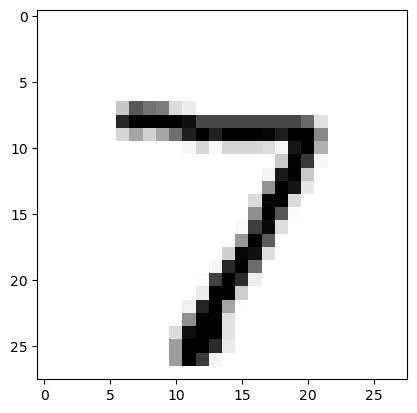

In [102]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [103]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.13251392],
       [0.08873961],
       [0.0396753 ],
       [0.18393843],
       [0.18186039],
       [0.04794563],
       [0.0447263 ],
       [0.46911427],
       [0.14824556],
       [0.07233491]])

[[5.80486235e-04]
 [8.01666843e-03]
 [3.23665672e-04]
 [1.94773464e-01]
 [3.54794837e-05]
 [3.57481947e-02]
 [5.02268040e-04]
 [4.40160586e-03]
 [2.98032970e-05]
 [1.03728630e-03]]
Network says  3
match!


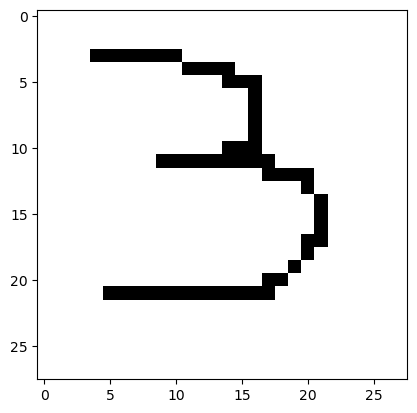

In [219]:
from PIL import Image
import numpy as np
color_img = np.asarray(Image.open("mnist_dataset/Handwritting.png"))
img = numpy.mean(color_img, axis=2)
our_own_dataset=img.reshape(784)


# reshape from 28x28 to list of 784 values, invert values
img_data  = img_array.reshape(784)
# then scale data to range from 0.01 to 1.0
img_data = (our_own_dataset / 255.0 * 0.99) + 0.01

# query the network
outputs = n.query(img_data)
print (outputs)

# plot image
matplotlib.pyplot.imshow(img.reshape(28,28), cmap='Greys', interpolation='None')

# correct answer is first value
correct_label = 3

# the index of the highest value corresponds to the label
label = numpy.argmax(outputs)
print("Network says ", label)
# append correct or incorrect to list
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass


